# Hudson River:   Enterococcus Study

__Walt Wells, Fall 2017__

## Data Source

Riverkeeper ( http://www.riverkeeper.org/)

__Provided Background:__ Enterococcus is a fecal indicating bacteria that lives in the intestines of humans and other warm-blooded animals. Enterococcus (“ Entero”) counts are useful as a water quality indicator due to their abundance in human sewage, correlation with many human pathogens and low abundance in sewage free environments. The United States Environmental Protection Agency (EPA) reports Entero counts as colonies (or cells) per 100 ml of water.

Riverkeeper has based its assessment of acceptable water quality on the 2012 Federal Recreational Water Quality Criteria from the US EPA. Unacceptable water is based on an illness rate of 32 per 1000 swimmers. The federal standard for unacceptable water quality is a single sample value of greater than 110 Enterococcus/100 mL, or five or more samples with a geometric mean (a weighted average) greater than 30 Enterococcus/100 mL.

__Additional Methodology:__  

"To avoid exposure to chronic contamination, the geometric mean, a weighted 30-day average, should not exceed 30 cells/100 mL. To avoid exposure to occasional high levels of contamination, no more than 10% of samples should exceed 110 cells/100 mL. Efforts should be made to reduce pollution in recreational waters that exceed these long term measures of water quality."

More information:
* https://www.riverkeeper.org/water-quality/testing/what/
* https://www.riverkeeper.org/blogs/boat-blog/hudson-water-quality-report-data-from-may-river-patrol/
* https://www.riverkeeper.org/water-quality/hudson-river/albany-rensselaer/hudson-above-mohawk-river/

## Environment Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Prep

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv')
print df.dtypes
print df.shape
df.head()

Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object
(3397, 5)


,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


In [3]:
print df['EnteroCount'].value_counts().head()

## We see that a choice was made to show signs like greater than or less than values.   
## For now, we'll strip punctuation and replace with the number boundary.   

df['EnteroCount'] = df['EnteroCount'].str.replace('[^\w\s]','')
df['EnteroCount'] = pd.to_numeric(df['EnteroCount'])
print df['EnteroCount'].value_counts().head()

<10    528
10     289
20     148
2       83
4       78
Name: EnteroCount, dtype: int64
10    817
20    148
1     121
2      83
4      78
Name: EnteroCount, dtype: int64


In [4]:
df['Date'] = pd.Series([pd.to_datetime(d) for d in df['Date']])
df['Site'] = df['Site'].astype('category')

print df.dtypes
df.head()

Site                      category
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object


,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,2011-10-16,1733,1.5,35
1,Hudson above Mohawk River,2013-10-21,4,0.2,35
2,Hudson above Mohawk River,2013-09-21,20,0.0,35
3,Hudson above Mohawk River,2013-08-19,6,0.0,35
4,Hudson above Mohawk River,2013-07-21,31,0.0,35


In [5]:
print df['Date'].max()
print df['Date'].min()

2013-10-21 00:00:00
2006-09-19 00:00:00


## Create lists & graphs of the best and worst places to swim in the dataset.

In [6]:
sitemeans = df.groupby(df['Site'])["EnteroCount"].mean().reset_index()
BestSwim = sitemeans.sort_values('EnteroCount').reset_index(drop=True)[0:8]
BestSwim.head()

,Site,EnteroCount
0,Poughkeepsie Drinking Water Intake,8.342105
1,Croton Point Beach,15.458333
2,Stony Point mid-channel,17.340909
3,Little Stony Point,17.526316
4,Poughkeepsie Launch Ramp,17.675676


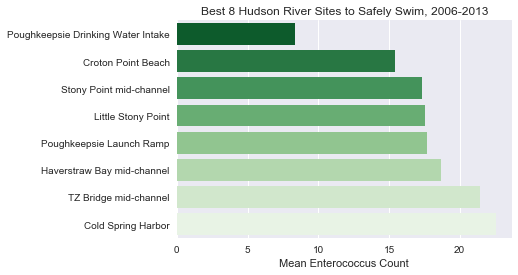

In [7]:
p = sns.barplot(y="Site", x="EnteroCount", data=BestSwim, order=BestSwim['Site'].values, palette="Greens_r")
p.set_ylabel('')
p.set_xlabel('Mean Enterococcus Count')
p.set_title('Best 8 Hudson River Sites to Safely Swim, 2006-2013')

In [8]:
WorstSwim = sitemeans.sort_values('EnteroCount', ascending=False).reset_index(drop=True)[0:8]
WorstSwim.head()

,Site,EnteroCount
0,Gowanus Canal,4206.837838
1,Newtown Creek- Metropolitan Ave. Bridge,2953.684211
2,Tarrytown Marina,2205.666667
3,Saw Mill River,1455.760000
4,Upper Sparkill Creek,1296.072727


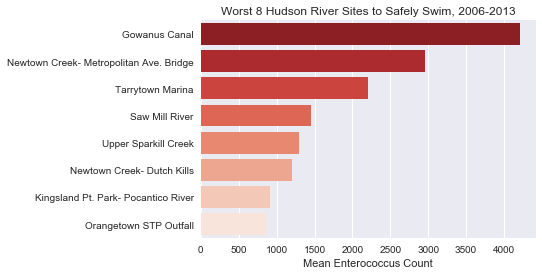

In [9]:
p = sns.barplot(y="Site", x="EnteroCount", data=WorstSwim, order=WorstSwim['Site'].values, palette="Reds_r")
p.set_ylabel('')
p.set_xlabel('Mean Enterococcus Count')
p.set_title('Worst 8 Hudson River Sites to Safely Swim, 2006-2013')

## The testing of water quality can be sporadic. Which sites have been tested most regularly? Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.

In [10]:
SiteCounts = df.groupby(by=["Site"])["Date"].count()
SiteCounts.sort_values(ascending=False, inplace=True)
SiteCounts.head()

Site
Piermont Pier            187
Upper Sparkill Creek     165
125th St. Pier            66
Nyack Launch Ramp         61
TZ Bridge mid-channel     57
Name: Date, dtype: int64

In [11]:
df = df.sort_values(['Site', 'Date'], ascending=[True, True])
df["DatePrior"] = df.groupby(["Site"])["Date"].shift(1)
df["DatePrior"].fillna(df["Date"], inplace=True)
df["DaysSinceLast"] = df["Date"].subtract(df['DatePrior']).astype('timedelta64[D]')
df.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,DatePrior,DaysSinceLast
2923,125th St. Pier,2006-10-02,1433,0.5,66,2006-10-02,0.0
2919,125th St. Pier,2006-10-03,773,0.4,66,2006-10-02,1.0
2917,125th St. Pier,2006-10-06,824,0.7,66,2006-10-03,3.0
2916,125th St. Pier,2006-10-11,269,0.4,66,2006-10-06,5.0
2915,125th St. Pier,2006-10-12,305,1.9,66,2006-10-11,1.0


In [12]:
df2 = df[['Site','DaysSinceLast']]
df2 = df2.loc[df2['DaysSinceLast'] != 0]
df2['std'] = df2['DaysSinceLast'].groupby(df2['Site']).transform('std')
df2['mean'] = df2['DaysSinceLast'].groupby(df2['Site']).transform('mean')
df2.head()

,Site,DaysSinceLast,std,mean
2919,125th St. Pier,1.0,65.57201,39.553846
2917,125th St. Pier,3.0,65.57201,39.553846
2916,125th St. Pier,5.0,65.57201,39.553846
2915,125th St. Pier,1.0,65.57201,39.553846
2914,125th St. Pier,19.0,65.57201,39.553846


In [13]:
# Let's get the sites with the most and least variability
bottom = df2['std'].quantile(.2) 
top = df2['std'].quantile(.98)

LowestVar = df2.loc[df2['std'] < bottom].reset_index(drop=True)
HighestVar = df2.loc[df2['std'] > top].reset_index(drop=True)

All = LowestVar.append(HighestVar, ignore_index=True).reset_index(drop=True)

In [14]:
All['Site'] = All['Site'].astype('object')
All = All.sort_values(['mean'], ascending=[True])
All.head()

,Site,DaysSinceLast,std,mean
565,Upper Sparkill Creek,7.0,31.828441,13.719512
603,Upper Sparkill Creek,8.0,31.828441,13.719512
495,Upper Sparkill Creek,1.0,31.828441,13.719512
494,Upper Sparkill Creek,2.0,31.828441,13.719512
493,Upper Sparkill Creek,1.0,31.828441,13.719512


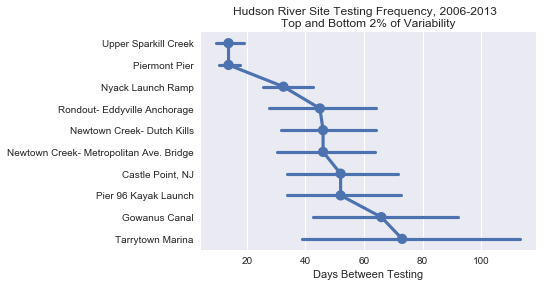

In [15]:
p2 = sns.pointplot(data=All, y="Site", x="DaysSinceLast")
p2.set_ylabel('')
p2.set_xlabel('Days Between Testing')
p2.set_title('Hudson River Site Testing Frequency, 2006-2013  \nTop and Bottom 2% of Variability')

## Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.

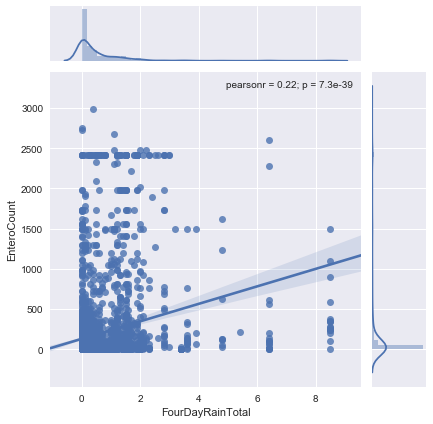

In [16]:
Subset = df[df.EnteroCount < 3000] # Superfund removal
sns.jointplot("FourDayRainTotal", "EnteroCount", Subset, kind="reg")

In [17]:
RFTotal = df.groupby(by=["Site"])['FourDayRainTotal'].mean().reset_index()
LeastRF_Site = RFTotal.loc[RFTotal['FourDayRainTotal'] == RFTotal.FourDayRainTotal.min()]
MiddleRF_Site = RFTotal.loc[RFTotal['FourDayRainTotal'] == RFTotal.FourDayRainTotal.median()]
MiddleRF_Site = MiddleRF_Site.sample(1)
MaxRF_Site = RFTotal.loc[RFTotal['FourDayRainTotal'] == RFTotal.FourDayRainTotal.max()]

RFSiteExtremes = LeastRF_Site.append(MiddleRF_Site, ignore_index=True).append(MaxRF_Site, ignore_index=True)
RFSiteExtremes

,Site,FourDayRainTotal
0,West Point STP Outfall,0.280556
1,Gay's Point mid-channel,0.580556
2,79th St. mid-channel,0.861224


In [18]:
Min = Subset.loc[df['Site']==RFSiteExtremes.Site[0]]
Mid = Subset.loc[df['Site']==RFSiteExtremes.Site[1]]
Max = Subset.loc[df['Site']==RFSiteExtremes.Site[2]]

West Point STP Outfall


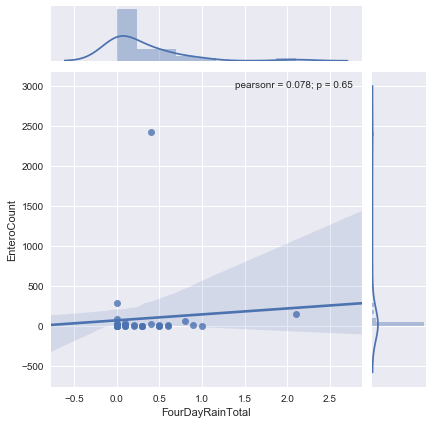

In [19]:
print RFSiteExtremes.Site[0]
sns.jointplot("FourDayRainTotal", "EnteroCount", Min, kind="reg")

Gay's Point mid-channel


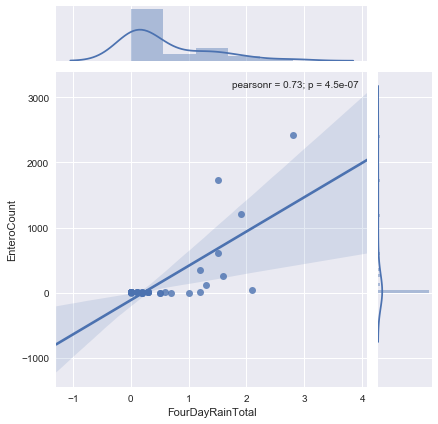

In [20]:
print RFSiteExtremes.Site[1]
sns.jointplot("FourDayRainTotal", "EnteroCount", Mid, kind="reg")

79th St. mid-channel


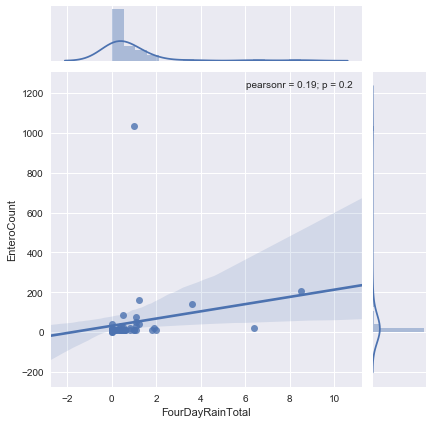

In [21]:
print RFSiteExtremes.Site[2]
sns.jointplot("FourDayRainTotal", "EnteroCount", Max, kind="reg")

What's interesting here is that for the samples sites we're looking at (sites with little and lots of rainfall) there isn't much of a correlation (using Pearson's Method) between Four Day Rain Total and Enterococcus count.   For a Site that has an average amount of rainfall, there is.   What this might imply is that for the average site, if they git hit by a lot of rain and have sewer issues, there is additional drainage of Fecal matter into the Hudson.

# References

* https://stackoverflow.com/questions/23543909/plotting-pandas-timedelta
* http://seaborn.pydata.org/generated/seaborn.pointplot.html